<a href="https://colab.research.google.com/github/turna1/Basics-of-Python-Programming/blob/main/ant_fsm_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FSM Problem Solving Using Python


## Problem statement (simple story)

You are making a tiny game where an **ant** does three things:

- **find leaf**: roam toward a leaf to collect it  
- **go home**: if the ant has a leaf, go back to its home  
- **run away**: if the mouse cursor comes too close, the ant runs away for safety  

The ant switches between these **behaviours** based on simple distances:
- `cursor_distance` (how close the player's mouse is to the ant)
- `leaf_distance` (how close a leaf is)
- `home_distance` (how close the ant is to home)

Your task: build a small **ant brain** using a **Finite-State Machine (FSM)**.



## What is an FSM (Finite-State Machine)?

- An FSM is a way to organize behaviour using a **small set of named states**.
- The system is in **one state at a time** (e.g., `findLeaf`, `goHome`, or `runAway`).
- **Transitions** move the system from one state to another when **conditions** are true.
- **Why useful here?** It keeps beginner game AI simple: each state is a small function, easy to test and reason about.



## How the FSM solves our ant's behaviour

We define **three states** and **simple rules** (thresholds are easy to tweak):

- `runAway` if `cursor_distance <= 120`
- `goHome` if we **have a leaf** or `leaf_distance <= 10` (we "grab" it when close)
- `findLeaf` when we are safe and don't have a leaf yet
- From `goHome` to `findLeaf` when `home_distance <= 10` (we "arrived" and drop the leaf)

We'll implement each state as its **own function in its own cell** to keep things modular and beginner-friendly.


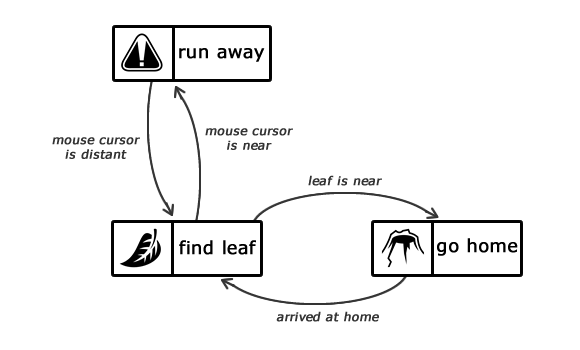

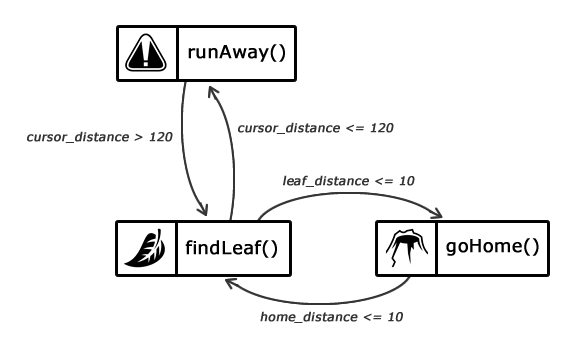

In [ ]:
from math import sqrt

# --- Helper functions ---
def dist(a, b):
    """Distance between two points (x1,y1) and (x2,y2)."""
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)









In [ ]:

def move_towards(pos, target, step=5):
    """
    Move from current position 'pos' a little closer to 'target'.
    Step size controls how fast the ant moves.
    """
    x, y = pos
    tx, ty = target
    d = dist(pos, target)
    if d == 0:
        return pos  # already there
    return (x + (tx-x)/d*step, y + (ty-y)/d*step)


In [ ]:

# --- World setup ---
ant = {"pos": (0,0), "state": "findLeaf", "has_leaf": False}  # the ant
leaf = (50,0)    # leaf position
home = (0,100)   # home position
cursor = (200,200) # mouse cursor (pretend player control)

# Thresholds (rules)
CURSOR_NEAR = 120  # too close → ant runs away
LEAF_NEAR = 10     # if closer than this → leaf picked up
HOME_NEAR = 10     # if closer than this → reached home

In [ ]:
# --- State functions ---
def findLeaf(ant):
    """Behaviour: search for a leaf."""
    # If the mouse cursor is too close → switch to runAway
    if dist(ant["pos"], cursor) <= CURSOR_NEAR:
        ant["state"] = "runAway"
        return

    # Otherwise, keep moving toward the leaf
    ant["pos"] = move_towards(ant["pos"], leaf)

    # If close enough → pick it up and go home
    if dist(ant["pos"], leaf) <= LEAF_NEAR:
        ant["has_leaf"] = True
        ant["state"] = "goHome"

In [ ]:
def goHome(ant):
    """Behaviour: return home with the leaf."""
    # Danger check first
    if dist(ant["pos"], cursor) <= CURSOR_NEAR:
        ant["state"] = "runAway"
        return

    # Move toward home
    ant["pos"] = move_towards(ant["pos"], home)

    # If close enough to home → drop leaf and find a new one
    if dist(ant["pos"], home) <= HOME_NEAR:
        ant["has_leaf"] = False
        ant["state"] = "findLeaf"


In [ ]:
def runAway(ant):
    """Behaviour: escape from the mouse cursor."""
    ax, ay = ant["pos"]
    cx, cy = cursor
    # Compute a point opposite the cursor (away direction)
    away = (ax + (ax-cx), ay + (ay-cy))

    # Run fast in that direction
    ant["pos"] = move_towards(ant["pos"], away, step=8)

    # Once safe again → resume normal work
    if dist(ant["pos"], cursor) > CURSOR_NEAR:
        ant["state"] = "goHome" if ant["has_leaf"] else "findLeaf"


In [ ]:

# --- Dispatcher (FSM brain) ---
def update(ant):
    """Call the right function depending on the ant's current state."""
    if ant["state"] == "findLeaf":
        findLeaf(ant)
    elif ant["state"] == "goHome":
        goHome(ant)
    elif ant["state"] == "runAway":
        runAway(ant)

In [ ]:
# --- Simulation loop ---
for step in range(15):
    update(ant)  # one FSM tick
    print(f"Step {step:02d}: pos={tuple(round(v,1) for v in ant['pos'])}, "
          f"state={ant['state']}, has_leaf={ant['has_leaf']}")


Step 00: pos=(43.6, 12.6), state=findLeaf, has_leaf=False
Step 01: pos=(45.9, 8.1), state=goHome, has_leaf=True
Step 02: pos=(43.6, 12.6), state=goHome, has_leaf=True
Step 03: pos=(41.4, 17.1), state=goHome, has_leaf=True
Step 04: pos=(39.2, 21.6), state=goHome, has_leaf=True
Step 05: pos=(36.9, 26.0), state=goHome, has_leaf=True
Step 06: pos=(34.7, 30.5), state=goHome, has_leaf=True
Step 07: pos=(32.5, 35.0), state=goHome, has_leaf=True
Step 08: pos=(30.2, 39.5), state=goHome, has_leaf=True
Step 09: pos=(28.0, 43.9), state=goHome, has_leaf=True
Step 10: pos=(25.8, 48.4), state=goHome, has_leaf=True
Step 11: pos=(23.5, 52.9), state=goHome, has_leaf=True
Step 12: pos=(21.3, 57.3), state=goHome, has_leaf=True
Step 13: pos=(19.1, 61.8), state=goHome, has_leaf=True
Step 14: pos=(16.8, 66.3), state=goHome, has_leaf=True
